# Project: Investigate TMDb Movie Data Set 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

##### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
We will try to clean and analyze the data set to make insights and answer our questions. We want to know which geners is more popular and more revenue for each year. Also, we will see if there is a correlation between budget and revenue. Finally, we want to see if the release quarter have impact to the revenue or not.



Import the library we will use

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

read the dataset

In [54]:
df = pd.read_csv('tmdb-movies.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [56]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Drop the columns that we won't need for our analyst

In [57]:
drop = ['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'runtime', 'production_companies', 'overview']
df.drop(columns=drop, inplace=True)

Remove the nulls

In [58]:
df.dropna(inplace=True)

The zero is treated as null, so we will replace it with nan to drop the row easelly

In [59]:
df['budget'].replace(0, np.nan, inplace=True)

In [60]:
df.dropna(inplace=True)

we will replace the zeros in revenue with the mean revenue

In [61]:
rev_mean = df['revenue_adj'].mean()
df['revenue_adj'].replace(0, rev_mean, inplace=True)

We are only intersted in adjusted budget and adjusted revenue. 
We will drop dudget and revenue columns.

In [62]:
df.drop(columns=['budget', 'revenue'], inplace=True)

We will remove the duplicated rows.

In [63]:
df.duplicated().sum()

1

In [64]:
df.drop_duplicates(inplace=True)

We want to see a summary statistics after we drop nulls and duplicates

In [65]:
df.describe()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5.164000e+03,5.164000e+03
mean,45451.436096,0.993184,409.029241,6.032552,2001.249613,3.692239e+07,1.282563e+08
std,72648.400363,1.329664,788.602561,0.883334,11.770772,4.196755e+07,1.872983e+08
min,5.000000,0.001117,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,8839.750000,0.348919,36.000000,5.500000,1996.000000,8.111388e+06,2.952721e+07
50%,12960.000000,0.625104,122.000000,6.100000,2005.000000,2.274082e+07,1.022724e+08
75%,44919.750000,1.153726,402.000000,6.600000,2010.000000,5.008384e+07,1.134790e+08
max,417859.000000,32.985763,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


We will take the first genre in genres column to analyze it easier

In [66]:
df.genres = df.genres.str.split('|').str[0]

In [67]:
df.head()

,id,popularity,original_title,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,Adventure,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Action,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,Action,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

First, we will show a histogram for each columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5df4b74850>,
      dtype=object)

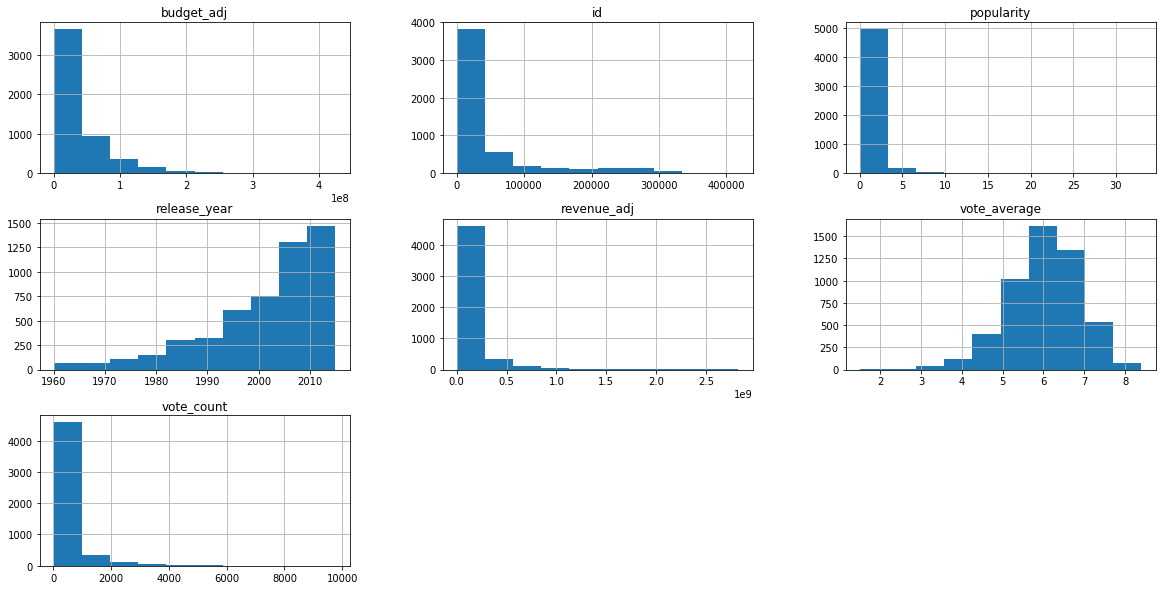

In [68]:
df.hist(figsize=(20,10))

W can see that most of budget and revenue values in the same range. Also most of movies in the data set relased after 2000.

### Research Question 1: Which genres are most popular from year to year?

We want to see the distribution for each genres

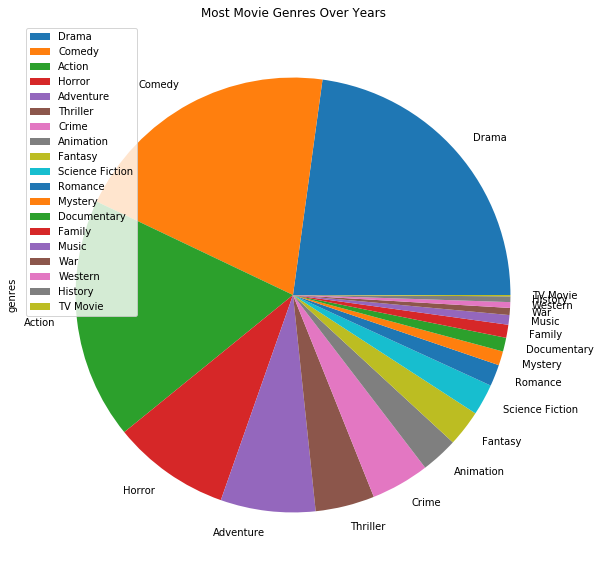

In [69]:
df.genres.value_counts().plot.pie(figsize=(10,10), title='Most Movie Genres Over Years', legend=True)

The pie chart shows that most genres over years are Drama, Comedy and Action.

We will group the data on release date column, and find the max popular value.
We used idxmax() to be able to return the entire row.

In [70]:
gen_pop = df.loc[df.groupby('release_year')["popularity"].idxmax()]
gen_pop[['release_year','genres']]

,release_year,genres
10141,1960,Drama
10110,1961,Adventure
9849,1962,Adventure
10438,1963,Action
9881,1964,Adventure
10689,1965,Adventure
10820,1966,Animation
10398,1967,Family
9719,1968,Science Fiction
10724,1969,Adventure


In [71]:
gen_pop.genres.value_counts()

Adventure          17
Action             10
Drama               7
Science Fiction     5
Animation           5
Crime               3
Horror              2
Romance             2
Family              1
Music               1
Comedy              1
Fantasy             1
Thriller            1
Name: genres, dtype: int64

### Research Question 2: Which genres are most revenue from year to year?

We will group the data on release date column, and find the max revenue value.
We used idxmax() to be able to return the entire row.

In [72]:
gen_rev = df.loc[df.groupby('release_year')["revenue_adj"].idxmax()]
gen_rev[['release_year','genres']]

,release_year,genres
10143,1960,Action
10110,1961,Adventure
9850,1962,Adventure
10438,1963,Action
9881,1964,Adventure
10690,1965,Drama
10822,1966,Drama
10398,1967,Family
9719,1968,Science Fiction
10725,1969,History


In [73]:
gen_rev.genres.value_counts()

Adventure          24
Drama              10
Action              8
Science Fiction     3
Animation           3
Horror              2
Family              2
Comedy              1
Fantasy             1
History             1
Crime               1
Name: genres, dtype: int64

### Research Question 3: Does There is a Correlation Between Budget and Revenue?

In [74]:
df.columns

Index(['id', 'popularity', 'original_title', 'director', 'genres',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

The correlation between budget and revenue is moderate postive

In [75]:
df.budget_adj.corr(df.revenue_adj)

0.5485650910091032

Text(0, 0.5, 'revenue')

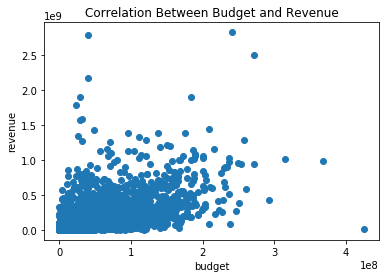

In [76]:
plt.scatter(df.budget_adj, df.revenue_adj)
plt.title('Correlation Between Budget and Revenue')
plt.xlabel('budget')
plt.ylabel('revenue')

The scatter above shows that there is correlation between bduget and revenue columns.

### Research Question 4: Does the release date quarter have effect in the revenue?

We will convert the release date column to date data type to extract the quarter from the year.

In [77]:
df.release_date = pd.to_datetime(df.release_date)
df['quarter'] = df.release_date.dt.quarter
df.release_date = pd.to_datetime(df.release_date).dt.strftime('%m/%d/%y')
df.tail()

,id,popularity,original_title,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quarter
10835,5923,0.299911,The Sand Pebbles,Robert Wise,Action,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,4
10841,42701,0.264925,The Shooting,Monte Hellman,Western,10/23/66,12,5.5,1966,5.038511e+05,1.022724e+08,4
10848,2161,0.207257,Fantastic Voyage,Richard Fleischer,Adventure,08/24/66,42,6.7,1966,3.436265e+07,8.061618e+07,3
10855,13343,0.141026,The Ghost & Mr. Chicken,Alan Rafkin,Comedy,01/20/66,14,6.1,1966,4.702610e+06,1.022724e+08,1
10865,22293,0.035919,Manos: The Hands of Fate,Harold P. Warren,Horror,11/15/66,15,1.5,1966,1.276423e+05,1.022724e+08,4


In [78]:
df.groupby('quarter')['budget_adj'].mean().sort_values(ascending=False)

quarter
2    4.469686e+07
4    4.171169e+07
3    3.163400e+07
1    2.920074e+07
Name: budget_adj, dtype: float64

First we want to see which quarter have more mean budget

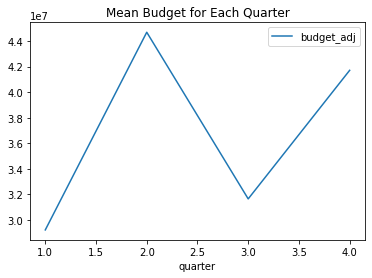

In [79]:
df.groupby('quarter')['budget_adj'].mean().plot(title='Mean Budget for Each Quarter', legend=True)

The quarter 2 and 4 have more mean budget

In [80]:
df.groupby('quarter')['revenue_adj'].mean().sort_values(ascending=False)

quarter
2    1.655369e+08
4    1.453100e+08
3    1.027184e+08
1    9.918996e+07
Name: revenue_adj, dtype: float64

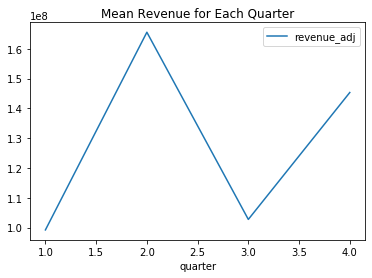

In [81]:
df.groupby('quarter')['revenue_adj'].mean().plot(title='Mean Revenue for Each Quarter', legend=True)

As we can see, the movies that released in quarter 2 and 4 have more revenue in average. But, also the budget quarter 2 and 4 are higher.

<a id='conclusions'></a>
## Conclusions

To summarize our analysis, we find that the adventure movies are most revenue and popular over the years. Also, we find a moderate postive correlation between budget and revenue. the last thing in our analysis, we showed that the movies that released in quarter 2 and 4 have more revenue.
the limitations in this data set is that there are a lot of zero values in budget and revenue columns. this casue me to drop all the rows with zero budget value and drop most of rows with zero revenue value.
